# 03 Geometric Machine Learning for Shape Analysis

## D) Unsupervised Learning: Clustering

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE


<center><img src="figs/03_kmeans_intro.png" width=650px alt="default"/></center>

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - A) Mean and Covariance
  - B) Classification
  - C) Regression
  - **D) Clustering**
  - E) Dimension Reduction

### Unsupervised Learning in ML

Machine Learning is divided into two principal categories of algorithms: supervised and unsupervised learning algorithms. Both learn from data.

$\color{#EF5645}{\text{Definition}}$: _Unsupervised learning_ refers to the task of discovering any naturally occuring patterns in a dataset of data points $x$. We say that the method is:
- a _clustering_: if we want to find groups (clusters),
- a _dimension reduction_: if we want to find the main sources of data variations.

### Review of Traditional Clustering



$\color{#EF5645}{\text{Given}}$:
- Dataset $(X_1, . . . , X_n)$, 
- Integer $k$ representing a desired number of groups.


<center><img src="figs/03_clustering.jpg" width=450px alt="default"/></center>
<center>Inputs: $X_1, ..., X_n \in \mathbb{R}^2$.</center>

$\rightarrow \color{#EF5645}{\text{Goal}}$: Cluster $n$ data points into $k$ group such that points in the same group are "close".

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - A) Mean and Covariance
  - B) Classification
  - C) Regression
  - **D) Clustering**
    - Motivation: Shapes of Optical Nerve Heads
    - Clustering Method 1: Tangent ML
    - Clustering Method 2: Riemannian K-Means
  - E) Dimension Reduction

# Motivation: Clustering of Optical Nerve Heads

### Motivation: Two Groups of Optical Nerve Heads

$\color{#EF5645}{\text{Question}}$: Are the shapes of optic nerve heads split into two clusters: healthy versus glaucoma?

$\color{#EF5645}{\text{Our answer}}$: Clustering on manifold:
- Dataset $(X_1, ..., X_n)$: $n$ nerve shapes represented in Kendall shape space with $3$ landmarks.
- Integer $k = 2$ groups

<center><img src="figs/01_optic_nerves.png" width=400px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

label_to_str = {0: "Normal nerve", 1: "Glaucoma nerve"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}


### Data

We use data acquired with a Heidelberg Retina Tomograph - Patrangenaru and Ellingson (2015):
- 11 Rhesus monkeys
- 22 images of monkeys’ eyes:
  - an experimental glaucoma was introduced in one eye, 
  - while the second eye was kept as control.
  
$\rightarrow$ On each image, 3 anatomical "landmarks" were recorded, e.g. "superior aspect of the retina".

In [16]:
import geomstats.datasets.utils as data_utils

nerves, labels, monkeys = data_utils.load_optical_nerves()
landmarks = [2, 3, 4]
nerves = nerves[:, landmarks, :]

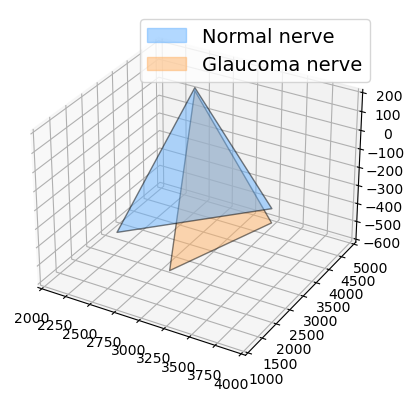

In [17]:
two_nerves = nerves[monkeys == 0]; two_labels = labels[monkeys == 0]

fig = plt.figure(); ax = fig.add_subplot(111, projection="3d"); 
ax.set_xlim((2000, 4000))
ax.set_ylim((1000, 5000))
ax.set_zlim((-600, 200))
for label, nerve in zip(two_labels, two_nerves):
    x = nerve[:, 0]; y = nerve[:, 1]; z = nerve[:, 2]
    verts = [list(zip(x, y, z))]

    poly = Poly3DCollection(verts, alpha=0.5)
    color = label_to_color[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5); patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 14}); plt.show()

## Clustering Method 1: Tangent Machine Learning

### Recall: Tangent Space at the Fréchet Mean

The Fréchet mean gives us a way of transforming our non-linear data into vectors!
1. Compute the Fréchet mean $\bar{x}$ of the data points
2. Consider the tangent space $T_\bar{x}M$of the manifold $M$ at $\bar{x}$
3. Compute the Logarithms of the data points at $\bar{x}$

$\rightarrow$ Get a dataset on a vector space, and apply classical machine learning on it.

$\color{#EF5645}{\text{Remark}}$: Since we have seen Tangent Machine Learning several times already, we skip it for clustering.

# Clustering Method 2: Riemannian K-Means

### Why another clustering method?

$\color{#EF5645}{\text{Previous subsection}}$: Clustering Method 1:
- "Project" data on the tangent space at the FrechetMean: `ToTangentSpace`.
- Apply a traditional clustering on the tangent space: e.g., `KMeans`.

However, projecting the data on the tangent space deforms their distribution: the geometry of the curved manifold affects the traditional regression results.

$\color{#EF5645}{\text{This subsection}}$: Clustering Method 2:
- Keep data on the manifold with Riemannian K-Means

# From K-Means to Riemannian K-Means

Traditional K-Means only depends on two notions: squared distance and a mean.

For Riemannian K-Means:
- Replace squared Euclidean distance by squared geodesic distance,
- Replacemean by FrechetMean.

<center><img src="figs/03_it0.png" alt="default"/></center>

<center><img src="figs/03_it1.png" alt="default"/></center>

<center><img src="figs/03_it2.png" alt="default"/></center>

<center><img src="figs/03_it3.png" alt="default"/></center>

<center><img src="figs/03_it4.png" alt="default"/></center>

<center><img src="figs/03_it5.png" alt="default"/></center>

# Riemannian K-Means

- $\color{#EF5645}{\text{Notations}}$:
  - Group $G_j$ for $j=1, ..., k$: Set of indices in $1, ..., N$ representing which points belong to the group.
  - Assignment $c_i$ for $i=1,...,k$: Group that $x_i$ is in: $i \in G_{c_i}$
  - Group representative $z_j$ for $j=1, ..., k$: point that represents a typical element of the group $G_j$.

- $\color{#EF5645}{\text{Goal}}$: Find $c_i$ and $z_j$ to minimize $L = \frac{1}{N}\sum_{i=1}^N \color{#EF5645}{d(x_i, z_{c_i})}^2$
, i.e. the mean geodesic square distance from points to their representatives.


# (i) Update the groups

- Given: representatives $z_1, ..., z_k$
- $\color{#EF5645}{\text{Goal for (i)}}$: Assign points to groups, i.e. choose $c_1, ..., c_N$
  - We assign each point to its nearest representative. Justification:
    - Observe: $c_i$ only appears in term $\color{#EF5645}{d(x_i, z_{c_i})}^2$ in $L$
    - Conclude: to minimize over $c_i$, choose $c_i$ so $\color{#EF5645}{d(x_i, z_{c_i} )}^2 = min_{j \in \{1, ..., k\}} \color{#EF5645}{d(x_i, z_j )}^2$.

# (ii) Update the representatives

- Given the partition $G_1, . . . , G_k$
- $\color{#EF5645}{\text{Goal for (ii)}}$: Choose representatives $z_1, . . . , z_k$
  - Choose $z_j$ = Frechet mean of the points in group $j$. Justification:
    - Observe: $L$ splits into a sum of $k$ sums: 
$$L = L_1 + · · · + L_k, \quad L_j = \frac{1}{N} \sum_{i \in G_j} d(x_i, z_j)^2.$$
    - Conclude: Choose $z_j$ to minimize its $L_j$: $z_j$  $\color{#EF5645}{\text{Frechet mean/center/centroid.}}$

## Example: Riemannian KMeans On the Sphere

In [37]:
import matplotlib.pyplot as plt
import numpy as np

import geomstats.visualization as viz
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

Generate synthetic data on the sphere.

In [43]:
from sklearn.model_selection import train_test_split

sphere = Hypersphere(dim=2)
cluster = sphere.random_von_mises_fisher(kappa=20, n_samples=140)

SO3 = SpecialOrthogonal(3)
rotation1 = SO3.random_uniform()
rotation2 = SO3.random_uniform()

cluster_1 = cluster @ rotation1
cluster_2 = cluster @ rotation2

data = np.concatenate((cluster_1, cluster_2), axis=0)

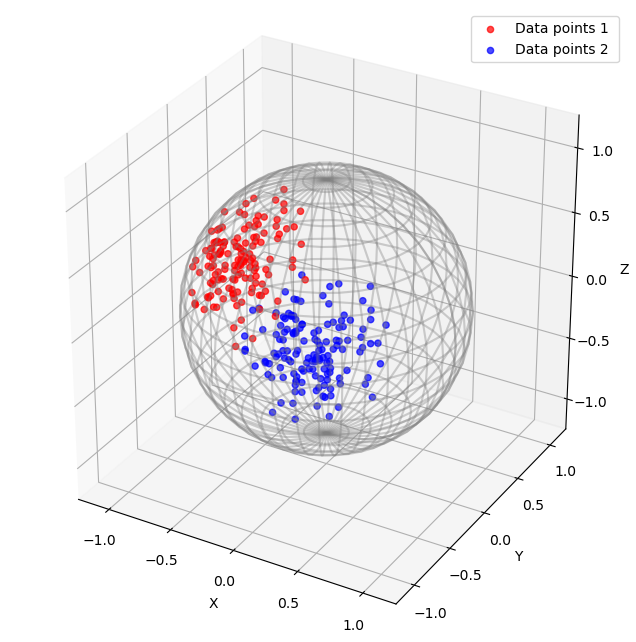

In [44]:
fig = plt.figure(figsize=(8, 8))
ax = viz.plot(
    cluster_1, space="S2", color="red", alpha=0.7, label="Data points 1 "
)
ax = viz.plot(
    cluster_2, space="S2", ax=ax, color="blue", alpha=0.7, label="Data points 2"
)
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend()
plt.show();

1. $\color{#EF5645}{\text{Modelling:}}$

- $\color{#EF5645}{\text{Decide on the model:}}$ We use Riemannian KMeans.
- $\color{#EF5645}{\text{Decide on a loss function:}}$ Associated $L$. 

In [46]:
from geomstats.learning.kmeans import RiemannianKMeans

kmeans = RiemannianKMeans(sphere.metric, 2, tol=1e-3, init_step_size=1.0)

2. $\color{#EF5645}{\text{Split dataset into train / test sets:}}$ 
   - Train $X_1, ..., X_{n_\text{train}}$: build the algorithm
   - Test $X_{n_\text{train}+1}, ..., X_n$: assess its performances.

In [48]:
train, test = train_test_split(data)

3. $\color{#EF5645}{\text{Train:}}$ Build the algorithm

In [49]:
centroids = kmeans.fit(train)
sphere.belongs(centroids)

array([ True,  True])

4. $\color{#EF5645}{\text{Test:}}$ Assess its performances

In [50]:
predicted_labels = kmeans.predict(test)
predicted_labels

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0])

Plot the results:

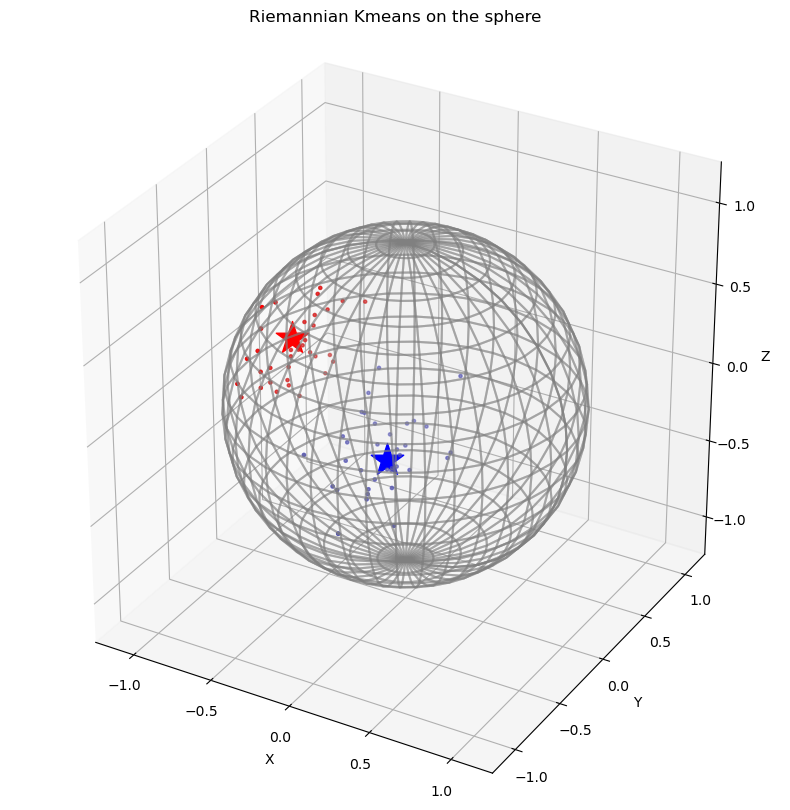

In [51]:
fig = plt.figure(figsize=(10, 10)); my_colors = ["red", "blue"]; ax = viz.plot(test, space="S2", marker=".", color="grey")
for i in range(2):
    ax = viz.plot(points=test[predicted_labels == i], ax=ax, space="S2", marker=".", color=my_colors[i])
for i, c in enumerate(centroids):
    ax = viz.plot(c, ax=ax, space="S2", marker="*", s=600, color=my_colors[i])
ax.set_title("Riemannian Kmeans on the sphere"); ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1]); plt.show()

## Example: Riemannian KMeans in Kendall Shape Space

Apply steps 1-4

In [62]:
from geomstats.geometry.pre_shape import PreShapeSpace, KendallShapeMetric

manifold = PreShapeSpace(k_landmarks=3, m_ambient=3)
metric = KendallShapeMetric(k_landmarks=3, m_ambient=3)
nerves = manifold.projection(nerves)

In [63]:
train, test = train_test_split(nerves)

In [64]:
kmeans = RiemannianKMeans(
    metric, n_clusters=2, tol=1e-3, init_step_size=1.0)
centroids = kmeans.fit(train)

In [65]:
predicted_labels = kmeans.predict(test)
predicted_labels

array([1, 0, 0, 0, 1, 0])

## Clustering Method 3: Riemannian MeanShift

- Review Traditional Meanshit
- Introduce Riemannian Meanshift


### Traditional MeanShift


$\color{#EF5645}{\text{Mean-shift}}$ locates maxima of a density functions given discrete data samples from this function.

$\color{#6D7D33}{\text{Mean-shift clustering: Method overview}}$ Given a kernel function $K$, typically an inversw of a notion of distance.
- Start with initial centroids $x$,
- Determine the weights of points $x_i \in N(x)$ in neighborhood $N(x)$,
- Estimate the weighted mean: 
$$m(x) = \frac{\sum_{x_i \in N(x)} K(x_i - x)x_i}{\sum_{x_i \in N(x)} K(x_i - x)}.$$
- Shift to the mean $m(x)$ and iterate.

<center><img src="figs/03_meanshift.png" width=800px alt="default"/></center>

![](https://miro.medium.com/max/864/1*vyz94J_76dsVToaa4VG1Zg.gif)

### Riemannian MeanShift


$\color{#EF5645}{\text{Mean-shift}}$ locates maxima of a density functions given discrete data samples from this function.

$\color{#6D7D33}{\text{Mean-shift clustering: Method overview}}$ Given a kernel function $K$, typically a notion of inverse of $\color{#EF5645}{\text{geodesic distance}}$ .
- Start with initial centroids $x$,
- Determine the weights of points $x_i \in N(x)$ in neighborhood $N(x)$,
- Estimate the weighted $\color{#EF5645}{\text{Frechet mean}}$
$$m(x) = \text{argmin}_m \sum_{x_i \in N(x)} \frac{K(x_i, x) d_M(m, x_i)^2}{\sum_{x_i \in N(x)} K(x_i, x)}.$$
- Shift to the mean $m(x)$ and iterate.

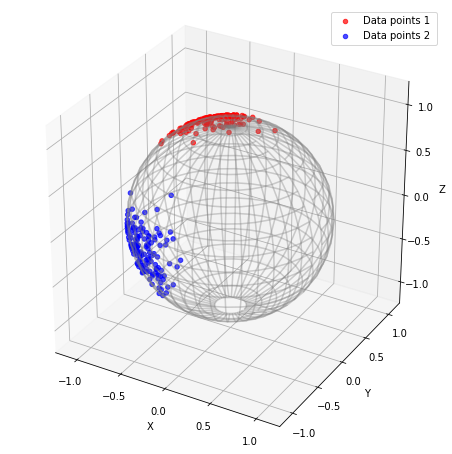

In [63]:
fig = plt.figure(figsize=(8, 8))
ax = viz.plot(
    cluster_1, space="S2", color="red", alpha=0.7, label="Data points 1 "
)
ax = viz.plot(
    cluster_2, space="S2", ax=ax, color="blue", alpha=0.7, label="Data points 2"
)
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend()
plt.show();

1. Set-up

- $\color{#EF5645}{\text{Decide on the model:}}$ We use Riemannian meanshift

In [64]:
from geomstats.learning.riemannian_mean_shift import RiemannianMeanShift

rms = RiemannianMeanShift(
    manifold=sphere,
    metric=sphere.metric,
    bandwidth=0.3,
    tol=1e-4,
    n_centers=20,
    init_centers="from_points",
)

3. $\color{#EF5645}{\text{Train:}}$ Build the algorithm

In [65]:
rms.fit(train)

In [66]:
print(rms.centers.shape)

(20, 3)


In [67]:
print(sphere.belongs(rms.centers))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


4. $\color{#EF5645}{\text{Test:}}$ Assess its performances

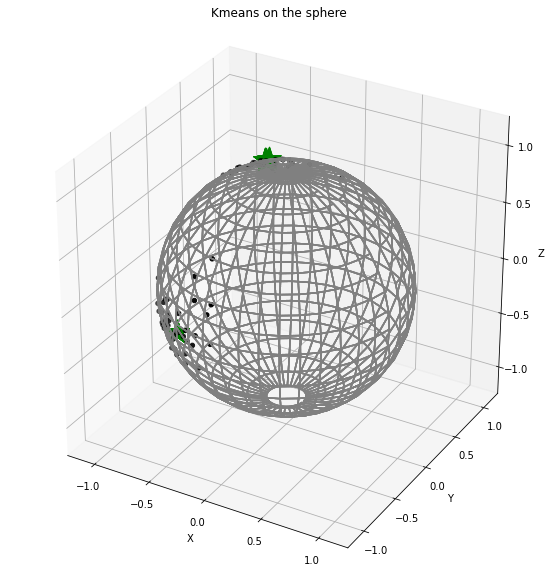

In [68]:
fig = plt.figure(figsize=(10, 10))
my_colors = ["red", "blue"]

ax = viz.plot(test, space="S2", marker=".", color="grey")

ax = viz.plot(
    points=test, ax=ax, space="S2", marker=".", s=80, color="black")

for i, c in enumerate(rms.centers):
    ax = viz.plot(c, ax=ax, space="S2", marker="*", s=600, color="green")

ax.set_title("Kmeans on the sphere")
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
plt.show()

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - A) Mean and Covariance
  - B) Classification
  - C) Regression
  - **D) Clustering**
    - Motivation: Shapes of Optical Nerve Heads
    - Clustering Method 1: Tangent ML
    - Clustering Method 2: Riemannian K-Means
  - E) Dimension Reduction|